# Advanced Transformations

**Marco Jimenez 6/30/2022**

In [50]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the OS and JSON Modules
import os,json

In [51]:
# Loading dataframes
info_df = pd.read_csv("Data/superhero_info - superhero_info.csv")
powers_df = pd.read_csv("Data/superhero_powers - superhero_powers.csv")

# Cleaning Superhero Info Dataframe

In [52]:
info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [53]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


Splitting the Hero|Publisher column

In [54]:
# Splitting the column and adding split columns to the original dataframe
info_df[['Hero','Publisher']] = info_df['Hero|Publisher'].str.split('|', expand=True)
# Dropping the Hero|Publisher column
info_df = info_df.drop(columns=['Hero|Publisher'])
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


Transforming the Measurements column

In [55]:
# Replacing the songle quotes with double quotes
info_df['Measurements'] = info_df['Measurements'].str.replace("'",'"')
# Applying json.loads to the column
info_df['Measurements'] = info_df['Measurements'].apply(json.loads)
info_df['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

Unpacking the dictionaries in the Measurements column into separate columns

In [56]:
# Applying pd.Series to convert each key to a new column
height_weight = info_df['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [57]:
# Concatenating the height & weight columns into the original dataframe
info_df = pd.concat((info_df, height_weight), axis=1)
# Dropping the Measurements column
info_df = info_df.drop(columns=['Measurements'])
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


Converting height & weight columns into numeric data

In [58]:
# Replacing 'cm' with a blank space from the Height column
info_df['Height'] = info_df['Height'].str.replace('cm','')
# Converting the column datatype to numeric
info_df['Height'] = pd.to_numeric(info_df['Height'])

In [59]:
# Replacing 'cm' with a blank space from the Height column
info_df['Weight'] = info_df['Weight'].str.replace('kg','')
# Converting the column datatype to numeric
info_df['Weight'] = pd.to_numeric(info_df['Weight'])
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


# Cleaning Superhero Powers Dataframe

In [60]:
powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [61]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [62]:
# Splitting the powers column on the comma
powers_df['powers_split'] = powers_df['Powers'].str.split(',')

In [63]:
# Using .explode to make separate rows for each value
exploded = powers_df.explode('powers_split')
exploded

,hero_names,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [64]:
# Getting the unique values in the powers_split column
cols_to_make = exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [69]:
# For loop to a new column for each unique value in cols_to_make
for col in cols_to_make:
    powers_df[col]= powers_df['Powers'].str.contains(col)
powers_df.head()                                                

C:\Users\LP-Ca\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# Merging the two dataframes together
merged = pd.merge(info_df, powers_df, left_on='Hero', right_on='hero_names')
merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


# Ansering questions with combined dataframe

1. Compare the average weight of super powers who have Super Speed to those who do not have Super Speed

In [77]:
# using groupby to compare the average weight of those with and without Super Speed
merged.groupby('Super Speed')['Weight'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

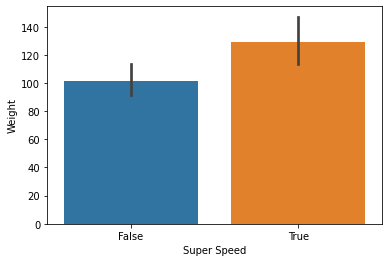

In [75]:
# Plotting it on a barplot
sns.barplot(data=merged, x='Super Speed', y='Weight');

2. What is the average height of heroes for each publisher

In [78]:
# Using groupby to group publishers by the average weight of their heroes
merged.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64